# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'api_keys'

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lats_lons = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lon = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats_lons = zip(lat, lon)

# Identify nearest city for each lat, lng combination
for lat_lon in lats_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_key 
query_url = url + "&q=" + city
response = requests.get(query_url).json()

# create lists to hold data
city_name = []
country = []
lat = []
lon = []
temp = []
max_temp = []
humid = []
cloud = []
wind = []

print('Beginning Data Retrieval')
print('------------------------')

record_counter = 0
set_counter = 1

for city in cities:
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    if record_counter >= 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 1
        print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))

    try: 
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        print('City not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------
Processing record 1 of set 2 | ushuaia
Processing record 1 of set 3 | avarua
Processing record 1 of set 4 | nome
Processing record 1 of set 5 | machachi
Processing record 1 of set 6 | talcahuano
Processing record 1 of set 7 | qaanaaq
Processing record 1 of set 8 | kribi
Processing record 1 of set 9 | la rioja
Processing record 1 of set 10 | saskylakh
Processing record 1 of set 11 | arraial do cabo
Processing record 1 of set 12 | mar del plata
Processing record 1 of set 13 | new norfolk
Processing record 1 of set 14 | rikitea
Processing record 1 of set 15 | hermanus
Processing record 1 of set 16 | taolanaro
City not found. Skipping...
Processing record 1 of set 17 | vaini
Processing record 1 of set 18 | kigoma
Processing record 1 of set 19 | lasa
Processing record 1 of set 20 | punta arenas
Processing record 1 of set 21 | grand centre
City not found. Skipping...
Processing record 1 of set 22 | isabela
Processing record 1 of set 23 | ancu

Processing record 1 of set 193 | vrangel
Processing record 1 of set 194 | atambua
Processing record 1 of set 195 | mount barker
Processing record 1 of set 196 | butaritari
Processing record 1 of set 197 | bykov
Processing record 1 of set 198 | bathsheba
Processing record 1 of set 199 | gaildorf
Processing record 1 of set 200 | oriximina
Processing record 1 of set 201 | cockburn town
Processing record 1 of set 202 | torbay
Processing record 1 of set 203 | sola
Processing record 1 of set 204 | abnub
Processing record 1 of set 205 | katsuura
Processing record 1 of set 206 | xacmaz
Processing record 1 of set 207 | lexington
Processing record 1 of set 208 | christchurch
Processing record 1 of set 209 | peace river
Processing record 1 of set 210 | barentsburg
City not found. Skipping...
Processing record 1 of set 211 | srednekolymsk
Processing record 1 of set 212 | necochea
Processing record 1 of set 213 | flin flon
Processing record 1 of set 214 | ishigaki
Processing record 1 of set 215 | f

Processing record 1 of set 375 | itoman
Processing record 1 of set 376 | gumdag
Processing record 1 of set 377 | mehamn
Processing record 1 of set 378 | emporia
Processing record 1 of set 379 | udachnyy
Processing record 1 of set 380 | teahupoo
Processing record 1 of set 381 | toora-khem
Processing record 1 of set 382 | general pico
Processing record 1 of set 383 | zhigansk
Processing record 1 of set 384 | santa cruz
Processing record 1 of set 385 | vila franca do campo
Processing record 1 of set 386 | vestmannaeyjar
Processing record 1 of set 387 | umm lajj
Processing record 1 of set 388 | ilhabela
Processing record 1 of set 389 | qinggang
Processing record 1 of set 390 | kedrovyy
Processing record 1 of set 391 | namibe
Processing record 1 of set 392 | campbellsville
Processing record 1 of set 393 | chadiza
Processing record 1 of set 394 | karratha
Processing record 1 of set 395 | quirinopolis
Processing record 1 of set 396 | nyagan
Processing record 1 of set 397 | port-cartier
Proces

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to keep data 
weather_data = {
    "City": city_name,
    "Country":country,
    "Cloudiness": cloud,
    "Humidity": humid,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Max Temp": max_temp,
    "Windspeed": wind   
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df

,City,Country,Cloudiness,Humidity,Latitude,Longitude,Temperature,Max Temp,Windspeed
0,Ushuaia,AR,90,74,-54.80,-68.30,33.80,33.80,16.11
1,Avarua,CK,72,73,-21.21,-159.78,73.40,73.40,12.75
2,Nome,US,1,59,64.50,-165.41,62.19,68.00,2.26
3,Machachi,EC,75,48,-0.50,-78.57,62.51,68.00,8.05
4,Talcahuano,CL,20,54,-36.72,-73.12,55.40,55.40,14.99
...,...,...,...,...,...,...,...,...,...
568,Avera,US,75,100,33.19,-82.53,82.45,86.00,10.29
569,Mwinilunga,ZM,0,27,-11.74,24.43,65.28,65.28,3.36
570,Iskateley,RU,100,91,67.68,53.15,49.55,49.55,13.15
571,Walvis Bay,NA,0,58,-22.96,14.51,54.72,55.40,9.17


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
humid_df = weather_df.loc[weather_df['Humidity'] < 100, : ]
less_humid = humid_df.sort_values('Humidity', ascending=False)
less_humid

,City,Country,Cloudiness,Humidity,Latitude,Longitude,Temperature,Max Temp,Windspeed
249,Guarapuava,BR,100,99,-25.40,-51.46,58.93,58.93,8.93
126,Gari,RU,100,98,59.43,62.35,50.18,50.18,5.50
300,Verkhotur'ye,RU,78,97,58.86,60.81,49.05,49.05,4.56
176,Puteyets,RU,100,97,65.17,57.09,50.79,50.79,3.83
290,Nantai,CN,100,97,40.92,122.80,68.07,68.07,11.07
...,...,...,...,...,...,...,...,...,...
20,Bilma,NE,56,14,18.69,12.92,98.98,98.98,4.63
311,Aripuanã,BR,0,14,-9.17,-60.63,104.23,104.23,3.47
235,Aswān,EG,0,14,24.09,32.91,92.95,92.95,12.15
25,Saint George,US,1,13,37.10,-113.58,105.26,107.01,7.34


In [6]:
#  Get the indices of cities that have humidity over 100%.
more_humid = weather_df.loc[weather_df['Humidity'] >= 100, : ]
more_humid

,City,Country,Cloudiness,Humidity,Latitude,Longitude,Temperature,Max Temp,Windspeed
14,Vaini,TO,90,100,-21.20,-175.20,73.40,73.40,29.55
30,Naze,JP,75,100,28.37,129.48,78.80,78.80,3.36
127,Petropavlovsk-Kamchatskiy,RU,90,100,53.05,158.65,51.80,51.80,6.71
184,Bykov,RU,90,100,47.32,142.55,62.60,62.60,6.71
226,Kathmandu,NP,75,100,27.72,85.32,71.60,71.60,2.24
268,Ziro,IN,58,100,27.63,93.83,57.38,57.38,1.39
277,Grindavik,IS,75,100,63.84,-22.43,51.80,51.80,14.99
291,Beaufort,MY,40,100,5.35,115.75,77.00,77.00,3.13
298,Esperance,AU,75,100,-33.87,121.90,48.20,48.20,14.99
312,Bowen,AU,0,100,-20.02,148.23,57.06,61.00,8.43


In [8]:
# Export the City_Data into a csv
less_humid.to_csv('../output_data/less_humid.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The closer you get to the equator, the warmer the temperature gets.


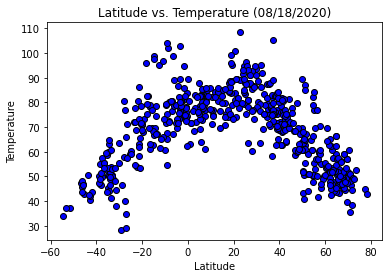

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter((less_humid['Latitude']), (less_humid['Temperature']), marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f"Latitude vs. Temperature ({today})")
plt.savefig("../output_data/lat_vs_temp.png")
print("The closer you get to the equator, the warmer the temperature gets.")

## Latitude vs. Humidity Plot

A weak argument could be made that it is less humid the closer you are to the equator.


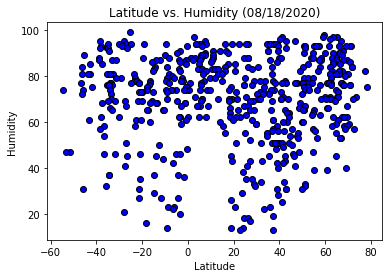

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter((less_humid['Latitude']), (less_humid['Humidity']), marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Latitude vs. Humidity ({today})')
plt.savefig("../output_data/lat_vs_humid.png")
print('A weak argument could be made that it is less humid the closer you are to the equator.')

## Latitude vs. Cloudiness Plot

There is no direct connection between latitude and cloudiness.


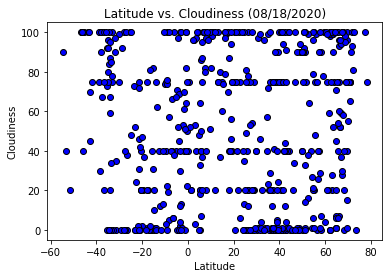

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter((less_humid['Latitude']), (less_humid['Cloudiness']), marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs. Cloudiness ({today})')
plt.savefig("../output_data/lat_vs_cloud.png")
print('There is no direct connection between latitude and cloudiness.')

## Latitude vs. Wind Speed Plot

Latitude has no bearing on windspeed.


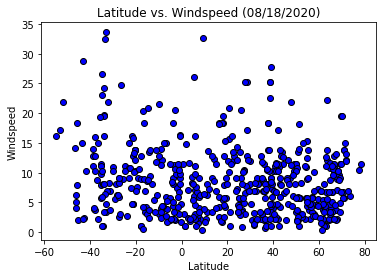

In [12]:
today = time.strftime("%m/%d/%Y")
plt.scatter((less_humid['Latitude']), (less_humid['Windspeed']), marker="o", facecolors="blue", edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title(f'Latitude vs. Windspeed ({today})')
plt.savefig("../output_data/lat_vs_wind.png")
print('Latitude has no bearing on windspeed.')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df['Latitude']>0, :]
southern_df = weather_df.loc[weather_df['Latitude']<0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.53x + 91.18
The further away you move from the equator, the lower the temperature.


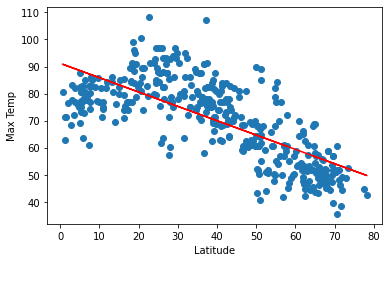

In [15]:
x_values = northern_df['Latitude']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The further away you move from the equator, the lower the temperature.')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.89x + 84.6
The closer you move from the equator, the higher the temperature.


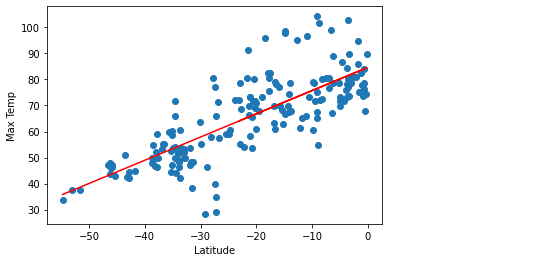

In [16]:
x_values = southern_df['Latitude']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f'The closer you move from the equator, the higher the temperature.')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 71.51
There is no direct connection between distance from the equator and humidity.


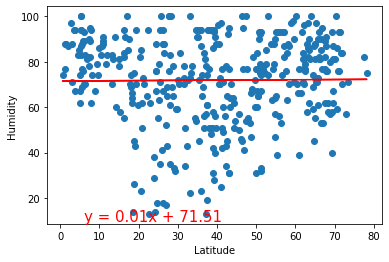

In [17]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'There is no direct connection between distance from the equator and humidity.')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.17x + 66.03
There is no direct connection between distance from the equator and humidity.


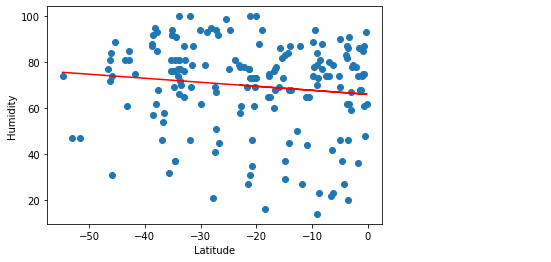

In [18]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'There is no direct connection between distance from the equator and humidity.')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 51.16
There is no direct connection between distance from the equator and cloudiness.


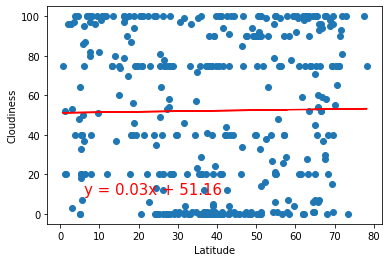

In [19]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'There is no direct connection between distance from the equator and cloudiness.')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.77x + 32.34
There is no direct connection between distance from the equator and humidity.


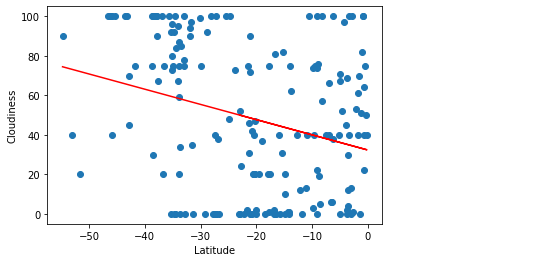

In [20]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'There is no direct connection between distance from the equator and humidity.')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 7.51
There is no direct connection between distance from the equator and cloudiness.


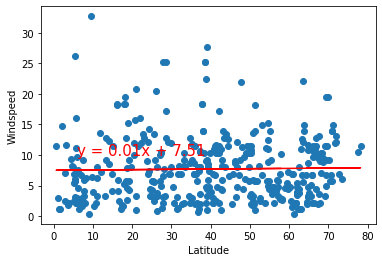

In [21]:
x_values = northern_df['Latitude']
y_values = northern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f'There is no direct connection between distance from the equator and cloudiness.')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.77x + 32.34
There is no direct connection between distance from the equator and cloudiness.


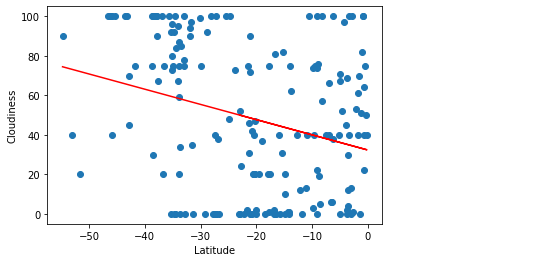

In [22]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
print(f'Regression line equation is: {line_eq}')
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'There is no direct connection between distance from the equator and cloudiness.')
plt.show()